In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [225]:
df = pd.read_csv(r'E:\Projects\ChurnPrediction\TelcoCustomerChurn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [227]:
df.drop(columns=['customerID'],inplace=True)
df.shape

(7043, 20)

In [228]:
df.describe(percentiles=[0.01, 0.05, 0.1, .25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,0.0,0.00,0.00,1.0,1.0,1.000,1.00
tenure,7043.0,32.371149,24.559481,0.00,1.0,1.00,2.00,9.0,29.00,55.00,69.0,72.0,72.000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,19.2,19.65,20.05,35.5,70.35,89.85,102.6,107.4,114.729,118.75


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

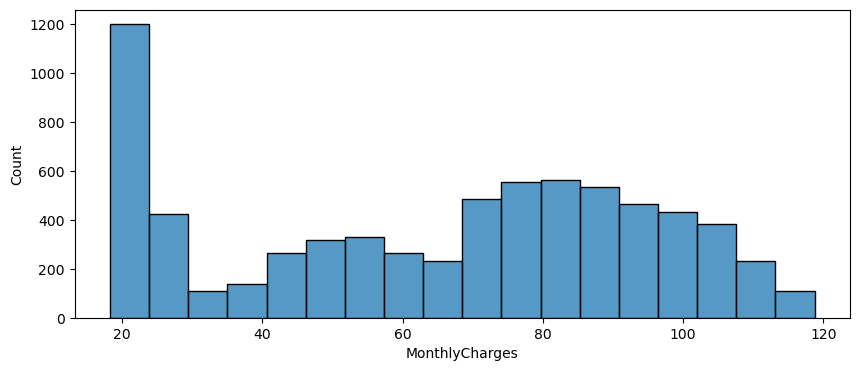

In [229]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='MonthlyCharges')

In [230]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [231]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn']
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].nunique())


Column: gender
2

Column: Partner
2

Column: Dependents
2

Column: PhoneService
2

Column: MultipleLines
3

Column: InternetService
3

Column: OnlineSecurity
3

Column: OnlineBackup
3

Column: DeviceProtection
3

Column: TechSupport
3

Column: StreamingTV
3

Column: StreamingMovies
3

Column: Contract
3

Column: PaperlessBilling
2

Column: PaymentMethod
4

Column: TotalCharges
6531

Column: Churn
2


In [232]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [234]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [235]:
df.dropna( inplace=True)

In [236]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [237]:
df.shape

(7032, 20)

In [216]:
from ydata_profiling import ProfileReport

In [217]:
profile = ProfileReport(df, title='EDA Report', explorative=True, orange_mode= False, minimal=False)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [238]:
y = df['Churn']
lable_enc = LabelEncoder()
y = lable_enc.fit_transform(y)

In [239]:
y.shape

(7032,)

In [ ]:
X = df.drop(columns=['Churn'])
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns
X_fit = pd.get_dummies(X[categorical_cols], drop_first=True, dtype=int)
numeric_block = X[['tenure','MonthlyCharges','TotalCharges']] 
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(numeric_block),
                        columns=numeric_block.columns,
                        index=numeric_block.index)
X_final = pd.concat([X_fit, X_scaled, X['SeniorCitizen']], axis=1)


In [256]:
# for col in X_fit.columns:
#     try:
#         X_final[col] = X_final[col].astype('int')
#     except:
#         pass

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=13, stratify=y)   # stratify keeps the churn ratio same in train and test


In [262]:
lr = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000, random_state=13)

In [264]:
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]
y_proba

array([0.86740804, 0.02402968, 0.81772197, ..., 0.04074732, 0.82650652,
       0.46966771])

In [265]:
confusion_matrix(y_test, y_pred)

array([[774, 259],
       [ 65, 309]], dtype=int64)

In [267]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9225    0.7493    0.8269      1033
           1     0.5440    0.8262    0.6561       374

    accuracy                         0.7697      1407
   macro avg     0.7333    0.7877    0.7415      1407
weighted avg     0.8219    0.7697    0.7815      1407



Text(0, 0.5, 'True Positive Rate')

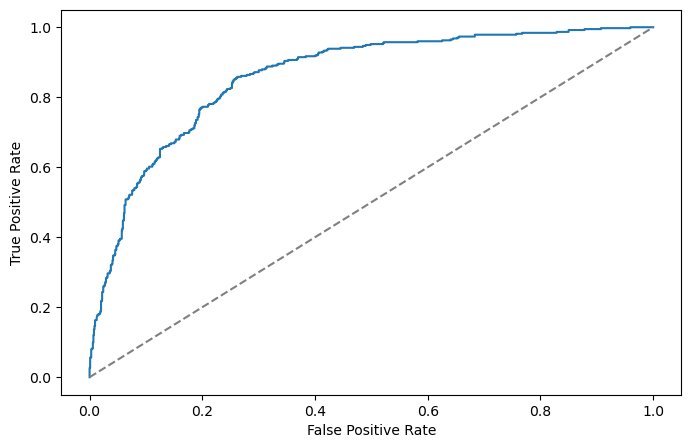

In [269]:
fpr, tpr, th = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, label=f'LogReg (AUC = {roc_auc_score(y_test, y_proba):.4f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')